In [1]:
import pandas as pd
import pickle
import sympy
import networkx as nx
import numpy as onp

In [2]:
def load_eq(eq_name,data_folder='../srsd-feynman_easy/train/',true_eq_folder='../srsd-feynman_easy/true_eq/'):
    dataframe = pd.read_csv(f'{data_folder}{eq_name}.txt',header=None,sep=' ').to_numpy()
    #X=dataframe[:,:-1,]
    #Y=dataframe[:,-1,]
    with open(f'{true_eq_folder}{eq_name}.pkl', 'rb') as f:
        equation = pickle.load(f)
    return dataframe,equation

def print_equation(eq):
    return sympy.Eq(sympy.S('x_2'), eq, evaluate=False)

X,eq=load_eq('feynman-i.12.1')
print_equation(eq)

Eq(x_2, x0*x1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)


Examining Node x2
Node x2 as a function of other nodes
x2 = 1.0 * x1x0 



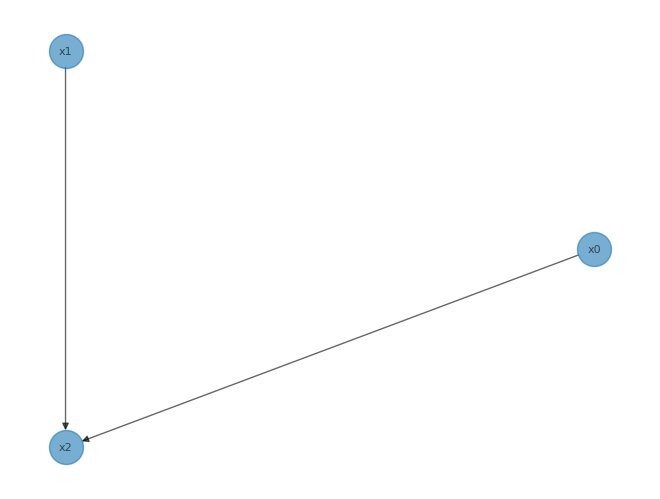

In [5]:
ks = [matern_five_halfs]*3
kpca = GraphDiscovery()

#d = 3
preG = nx.complete_graph(X.shape[1]).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array([f'x{k}' for k in range(X.shape[1])])
G = nx.relabel_nodes(G, {k:name for k,name in enumerate(names)})

examing_nodes = [-1]

fig = plt.figure
gamma = 1e-13
G = kpca.discovery_in_graph((X.T)[:,:200], ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-1, beta3=0, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()